In [1]:
import string
import numpy as np
import networkx
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import itertools
import sys
sys.path.append('..')

In [2]:
def parse_amazon(path='../datasets/amazon-meta.txt'):
    fhr = open(path, 'r', encoding='utf-8', errors='ignore')
    amazonProducts = {}
    (Id, ASIN, Copurchased) = ("", "", "")
    for line in tqdm(fhr):
        line = line.strip()
        # a product block started
        if(line.startswith("Id")):
            Id = line[3:].strip()
        elif(line.startswith("ASIN")):
            ASIN = line[5:].strip()
        elif(line.startswith("similar")):
            ls = line.split()
            Copurchased = ' '.join([c for c in ls[2:]])
        elif (line==""):
            try:
                MetaData = {}
                if (ASIN != ""):
                    amazonProducts[ASIN]=MetaData
                MetaData['Copurchased'] = Copurchased
            except NameError:
                continue
            (Id, ASIN, Copurchased) = ("", "", "")
    fhr.close()
    for asin, metadata in tqdm(amazonProducts.items()): 
        amazonProducts[asin]['Copurchased'] = \
        ' '.join([cp for cp in metadata['Copurchased'].split() \
            if cp in amazonProducts.keys()])
    copurchaseGraph = networkx.Graph()
    for asin,metadata in tqdm(amazonProducts.items()):
        copurchaseGraph.add_node(asin)
        for a in metadata['Copurchased'].split():
            copurchaseGraph.add_node(a.strip())
            similarity = 0        
            copurchaseGraph.add_edge(asin, a.strip())
    return copurchaseGraph

In [3]:
%%time

g_amazon = parse_amazon()

15010574it [00:54, 275260.96it/s]
100%|██████████| 548552/548552 [00:19<00:00, 27760.07it/s]


CPU times: user 1min 5s, sys: 3.95 s, total: 1min 9s
Wall time: 1min 20s


In [4]:
g_amazon.number_of_nodes(), g_amazon.number_of_edges()

(548552, 987942)

In [5]:
from scipy.stats import spearmanr, pearsonr, kendalltau

def assort_koefs(graph):
    x, y = [], []
    for e1, e2 in tqdm(graph.edges):
        x.append(graph.degree(e1))
        y.append(graph.degree(e2))
    print("pearson:", pearsonr(x, y))
    print("spearman:", spearmanr(x, y))
    print("kendall:", kendalltau(x, y))
    
assort_koefs(g_amazon)

100%|██████████| 987942/987942 [00:29<00:00, 34028.24it/s]


pearson: (0.039587708754383125, 0.0)
spearman: SpearmanrResult(correlation=0.06565549402832843, pvalue=0.0)
kendall: KendalltauResult(correlation=0.04715336844036409, pvalue=0.0)


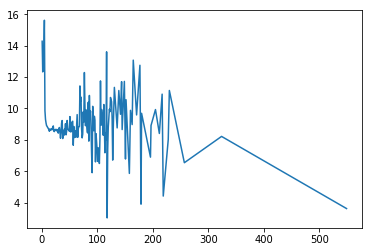

In [6]:
from src.utils import assort_plot

assort_plot(g_amazon)

(array([257367., 185538.,  58084.,  22133.,  10294.,   5368.,   3014.,
          1932.,   1285.,   3537.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

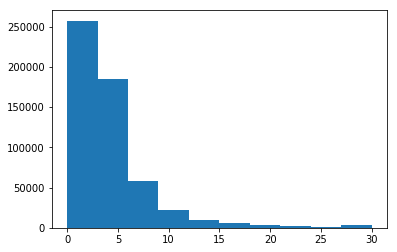

In [7]:
plt.hist([min(30, g_amazon.degree(i)) for i in g_amazon.nodes()])

In [8]:
from networkx.algorithms.components import connected_components

def components(graph, max_c_size=20):
    comps = []
    for c in connected_components(graph):
        comps.append(c)
    sizes = sorted([len(i) for i in comps])[::-1]
    print(sizes[:10])
    #plt.hist([min(i, 15) for i in sizes])

In [9]:
components(g_amazon)

[334859, 222, 184, 131, 101, 90, 86, 79, 78, 75]


In [10]:
del g_amazon
from src.utils import parse_6dfb

g_6dfb = parse_6dfb()
components(g_6dfb)

[12970, 11, 3, 3, 3, 3, 3, 2, 2, 2]


In [11]:
del g_6dfb

In [12]:
from src.utils import parse_twitter
g_twitter = parse_twitter()
components(g_twitter)

[87349, 17, 16, 14, 12, 12, 11, 11, 11, 11]
